<h1 align="center">IMDB Movies Analysis</h1>
<hr>

<b>DataSet :-</b> https://www.kaggle.com/datasets/samruddhim/imdb-movies-analysis

<h3>Problem Statement</h3><hr>

<b>Problem statement :-</b> Analyze trends in movie production over time, focusing on the popularity of different genres and how they have evolved since the early 1900s.<br>
<b>Objective :-</b> Explore how the production of movies in various genres has changed over the years and identify significant trends.


<h3>Data Preprocessing Steps</h3><hr>

In [4]:
# Load the data
import pandas as pd
df = pd.read_csv('imdb_dataset.csv') 
df.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie
2,3,Pauvre Pierrot,1892,NaN,4 min,"Animation, Comedy, Short",1892-10-28,�mile Reynaud,NaN,NaN,...,6.7,566.0,NaN,"One night, Arlequin come to see his lover Colo...","One night, Arlequin come to see his lover Colo...",NaN,France,NaN,2015-08-12 00:06:02.720000000,movie
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,...,5.9,988.0,NaN,A man (Thomas Edison's assistant) takes a pinc...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,2015-08-10 00:21:07.127000000,movie
4,10,Employees Leaving the Lumi�re Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,...,6.9,3469.0,NaN,A man opens the big gates to the Lumi�re facto...,A man opens the big gates to the Lumi�re facto...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie


In [5]:
# Handle Missing Values
# Remove rows with missing 'year' or 'genre' or 'imdbRating' since they are essential for analysis
# imdbID	title	year	rating	runtime	genre	released	imdbRating	imdbVotes	language	country	awards	type
df.isnull().sum()  # Check for missing values
df.dropna(subset=['imdbID', 'title', 'year', 'rating', 'runtime', 'genre', 'released', 'imdbRating', 'imdbVotes', 'language', 'country', 'type'], inplace=True)  # Remove rows with missing values in important columns
df.head()


,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
27,447,Life of an American Fireman,1903,NOT RATED,6 min,"Short, Action",1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
28,439,The Great Train Robbery,1903,TV-G,11 min,"Short, Western",1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
35,488,The Land Beyond the Sunset,1912,UNRATED,14 min,"Short, Drama, Fantasy",1912-10-28,Harold M. Shaw,Dorothy G. Shore,"Martin Fuller, Mrs. William Bechtel, Walter Ed...",...,7.1,448.0,https://m.media-amazon.com/images/M/MV5BMTMzMD...,"A young boy, opressed by his mother, goes on a...","Thanks to the Fresh Air Fund, a slum child esc...",English,USA,1 win.,2015-08-29 00:27:45.437000000,movie
45,833,The Country Doctor,1909,NOT RATED,14 min,"Short, Drama",1909-07-08,D.W. Griffith,NaN,"Kate Bruce, Adele DeGarde, Gladys Egan, Rose King",...,6.6,294.0,https://m.media-amazon.com/images/M/MV5BNjg3MT...,"While caring for his sick daughter, a doctor i...",In the peaceful valley of Stillwater there is ...,English,USA,NaN,2015-08-25 00:00:50.773000000,movie
46,832,A Corner in Wheat,1909,G,14 min,"Short, Drama",1909-12-13,D.W. Griffith,NaN,"Frank Powell, Grace Henderson, James Kirkwood,...",...,6.6,1375.0,NaN,"A greedy tycoon decides, on a whim, to corner ...","A greedy tycoon decides, on a whim, to corner ...",English,USA,1 win.,2015-08-13 00:46:30.660000000,movie


In [6]:
# Remove rows with missing 'year' or 'genre' since they are essential for analysis
df_cleaned = df.dropna(subset=['imdbID', 'title', 'year', 'rating', 'runtime', 'genre', 'released', 'imdbRating', 'imdbVotes', 'language', 'country', 'type'])
df_cleaned.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
27,447,Life of an American Fireman,1903,NOT RATED,6 min,"Short, Action",1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
28,439,The Great Train Robbery,1903,TV-G,11 min,"Short, Western",1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
35,488,The Land Beyond the Sunset,1912,UNRATED,14 min,"Short, Drama, Fantasy",1912-10-28,Harold M. Shaw,Dorothy G. Shore,"Martin Fuller, Mrs. William Bechtel, Walter Ed...",...,7.1,448.0,https://m.media-amazon.com/images/M/MV5BMTMzMD...,"A young boy, opressed by his mother, goes on a...","Thanks to the Fresh Air Fund, a slum child esc...",English,USA,1 win.,2015-08-29 00:27:45.437000000,movie
45,833,The Country Doctor,1909,NOT RATED,14 min,"Short, Drama",1909-07-08,D.W. Griffith,NaN,"Kate Bruce, Adele DeGarde, Gladys Egan, Rose King",...,6.6,294.0,https://m.media-amazon.com/images/M/MV5BNjg3MT...,"While caring for his sick daughter, a doctor i...",In the peaceful valley of Stillwater there is ...,English,USA,NaN,2015-08-25 00:00:50.773000000,movie
46,832,A Corner in Wheat,1909,G,14 min,"Short, Drama",1909-12-13,D.W. Griffith,NaN,"Frank Powell, Grace Henderson, James Kirkwood,...",...,6.6,1375.0,NaN,"A greedy tycoon decides, on a whim, to corner ...","A greedy tycoon decides, on a whim, to corner ...",English,USA,1 win.,2015-08-13 00:46:30.660000000,movie


In [7]:
# Fill missing runtime with 0 (unknown movies)
# df_cleaned['runtime'].fillna(0, inplace=True)
# Instead of using inplace=True, directly assign the result back to the 'runtime' column
df_cleaned['runtime'] = df_cleaned['runtime'].fillna(0)
# df.head()
df_cleaned.head()


,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
27,447,Life of an American Fireman,1903,NOT RATED,6 min,"Short, Action",1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
28,439,The Great Train Robbery,1903,TV-G,11 min,"Short, Western",1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
35,488,The Land Beyond the Sunset,1912,UNRATED,14 min,"Short, Drama, Fantasy",1912-10-28,Harold M. Shaw,Dorothy G. Shore,"Martin Fuller, Mrs. William Bechtel, Walter Ed...",...,7.1,448.0,https://m.media-amazon.com/images/M/MV5BMTMzMD...,"A young boy, opressed by his mother, goes on a...","Thanks to the Fresh Air Fund, a slum child esc...",English,USA,1 win.,2015-08-29 00:27:45.437000000,movie
45,833,The Country Doctor,1909,NOT RATED,14 min,"Short, Drama",1909-07-08,D.W. Griffith,NaN,"Kate Bruce, Adele DeGarde, Gladys Egan, Rose King",...,6.6,294.0,https://m.media-amazon.com/images/M/MV5BNjg3MT...,"While caring for his sick daughter, a doctor i...",In the peaceful valley of Stillwater there is ...,English,USA,NaN,2015-08-25 00:00:50.773000000,movie
46,832,A Corner in Wheat,1909,G,14 min,"Short, Drama",1909-12-13,D.W. Griffith,NaN,"Frank Powell, Grace Henderson, James Kirkwood,...",...,6.6,1375.0,NaN,"A greedy tycoon decides, on a whim, to corner ...","A greedy tycoon decides, on a whim, to corner ...",English,USA,1 win.,2015-08-13 00:46:30.660000000,movie


In [8]:
# Convert the year column to numeric format so we can analyze the trends over time.
df_cleaned['year'] = pd.to_numeric(df_cleaned['year'], errors='coerce')
df_cleaned['released'] = pd.to_datetime(df_cleaned['released'], errors='coerce')
# df.head()
df_cleaned.head()


,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
27,447,Life of an American Fireman,1903.0,NOT RATED,6 min,"Short, Action",1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
28,439,The Great Train Robbery,1903.0,TV-G,11 min,"Short, Western",1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
35,488,The Land Beyond the Sunset,1912.0,UNRATED,14 min,"Short, Drama, Fantasy",1912-10-28,Harold M. Shaw,Dorothy G. Shore,"Martin Fuller, Mrs. William Bechtel, Walter Ed...",...,7.1,448.0,https://m.media-amazon.com/images/M/MV5BMTMzMD...,"A young boy, opressed by his mother, goes on a...","Thanks to the Fresh Air Fund, a slum child esc...",English,USA,1 win.,2015-08-29 00:27:45.437000000,movie
45,833,The Country Doctor,1909.0,NOT RATED,14 min,"Short, Drama",1909-07-08,D.W. Griffith,NaN,"Kate Bruce, Adele DeGarde, Gladys Egan, Rose King",...,6.6,294.0,https://m.media-amazon.com/images/M/MV5BNjg3MT...,"While caring for his sick daughter, a doctor i...",In the peaceful valley of Stillwater there is ...,English,USA,NaN,2015-08-25 00:00:50.773000000,movie
46,832,A Corner in Wheat,1909.0,G,14 min,"Short, Drama",1909-12-13,D.W. Griffith,NaN,"Frank Powell, Grace Henderson, James Kirkwood,...",...,6.6,1375.0,NaN,"A greedy tycoon decides, on a whim, to corner ...","A greedy tycoon decides, on a whim, to corner ...",English,USA,1 win.,2015-08-13 00:46:30.660000000,movie


In [9]:
# Split the genre column into multiple rows for each movie
df_cleaned = df_cleaned.assign(genre=df_cleaned['genre'].str.split(',')).explode('genre')
df_cleaned['genre'] = df_cleaned['genre'].str.strip()  # Remove leading/trailing whitespace
# df.head()
df_cleaned.head()





,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
27,447,Life of an American Fireman,1903.0,NOT RATED,6 min,Short,1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
27,447,Life of an American Fireman,1903.0,NOT RATED,6 min,Action,1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
28,439,The Great Train Robbery,1903.0,TV-G,11 min,Short,1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
28,439,The Great Train Robbery,1903.0,TV-G,11 min,Western,1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
35,488,The Land Beyond the Sunset,1912.0,UNRATED,14 min,Short,1912-10-28,Harold M. Shaw,Dorothy G. Shore,"Martin Fuller, Mrs. William Bechtel, Walter Ed...",...,7.1,448.0,https://m.media-amazon.com/images/M/MV5BMTMzMD...,"A young boy, opressed by his mother, goes on a...","Thanks to the Fresh Air Fund, a slum child esc...",English,USA,1 win.,2015-08-29 00:27:45.437000000,movie


In [10]:
# Handling the Runtime
def convert_runtime(runtime):
    try:
        if isinstance(runtime, str):
            runtime = runtime.lower().strip()  # Convert to lowercase and strip extra spaces
            if 'h' in runtime:  # Check if it includes hours
                # Split by ' h ' to separate hours and minutes
                hours, minutes = runtime.split(' h ')
                # Handle cases where 'minutes' may or may not have 'min'
                minutes = minutes.replace(' min', '') if 'min' in minutes else minutes
                return int(hours) * 60 + int(minutes)  # Convert to total minutes
            elif 'min' in runtime:  # If it's only in minutes
                return int(runtime.replace(' min', '').strip())  # Remove 'min' and convert to integer
        elif isinstance(runtime, (int, float)):  # Handle numeric values directly
            return int(runtime)  # If runtime is already numeric
    except Exception as e:
        print(f"Error processing runtime: {runtime}, Error: {e}")  # Debugging output
    return 0  # Default to 0 for unknown or invalid formats

# Apply runtime conversion to the 'runtime' column
df_cleaned['runtime'] = df_cleaned['runtime'].apply(lambda x: convert_runtime(x))

# Display the first few rows to verify
df_cleaned.head()



Error processing runtime: 1,140 min, Error: invalid literal for int() with base 10: '1,140'
Error processing runtime: 1,140 min, Error: invalid literal for int() with base 10: '1,140'
Error processing runtime: 1,140 min, Error: invalid literal for int() with base 10: '1,140'


,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Short,1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Action,1903-01-01,"George S. Fleming, Edwin S. Porter",NaN,"Vivian Vaughan, Arthur White, James H. White",...,6.4,1158.0,https://m.media-amazon.com/images/M/MV5BMjAzNT...,Porter's sequential continuity editing links s...,Porter's sequential continuity editing links s...,English,USA,NaN,2015-08-29 00:26:36.093000000,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Short,1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Western,1903-12-01,Edwin S. Porter,NaN,"A.C. Abadie, Gilbert M. 'Broncho Billy' Anders...",...,7.4,9847.0,https://m.media-amazon.com/images/M/MV5BMTQ4ND...,A group of bandits stage a brazen train hold-u...,Among the earliest existing films in American ...,English,USA,1 win.,2015-08-13 00:27:59.177000000,movie
35,488,The Land Beyond the Sunset,1912.0,UNRATED,14,Short,1912-10-28,Harold M. Shaw,Dorothy G. Shore,"Martin Fuller, Mrs. William Bechtel, Walter Ed...",...,7.1,448.0,https://m.media-amazon.com/images/M/MV5BMTMzMD...,"A young boy, opressed by his mother, goes on a...","Thanks to the Fresh Air Fund, a slum child esc...",English,USA,1 win.,2015-08-29 00:27:45.437000000,movie


In [11]:
# Removing Unnecessary Columns
# director	writer	cast	metacritic  poster	plot	fullplot    lastupdated
columns_to_drop = ['director', 'writer', 'cast', 'metacritic', 'poster', 'plot', 'fullplot', 'lastupdated']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
# df.head()
df_cleaned.head()


,imdbID,title,year,rating,runtime,genre,released,imdbRating,imdbVotes,language,country,awards,type
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Short,1903-01-01,6.4,1158.0,English,USA,NaN,movie
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Action,1903-01-01,6.4,1158.0,English,USA,NaN,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Short,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Western,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
35,488,The Land Beyond the Sunset,1912.0,UNRATED,14,Short,1912-10-28,7.1,448.0,English,USA,1 win.,movie


In [12]:
# Dealing with Duplicates
df_cleaned.drop_duplicates(inplace=True)
# df.head()
df_cleaned.head()


,imdbID,title,year,rating,runtime,genre,released,imdbRating,imdbVotes,language,country,awards,type
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Short,1903-01-01,6.4,1158.0,English,USA,NaN,movie
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Action,1903-01-01,6.4,1158.0,English,USA,NaN,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Short,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Western,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
35,488,The Land Beyond the Sunset,1912.0,UNRATED,14,Short,1912-10-28,7.1,448.0,English,USA,1 win.,movie


In [13]:
# Optionally, remove or handle outliers in the runtime or rating columns
# Optionally remove or cap outliers in runtime and IMDb rating
df_cleaned = df_cleaned[(df_cleaned['runtime'] > 0) & (df_cleaned['runtime'] <= 300)]  # Movies between 0 and 300 minutes
df_cleaned = df_cleaned[(df_cleaned['imdbRating'] >= 0) & (df_cleaned['imdbRating'] <= 10)]  # Valid IMDb ratings (0-10)
# df.head()
df_cleaned.head()


,imdbID,title,year,rating,runtime,genre,released,imdbRating,imdbVotes,language,country,awards,type
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Short,1903-01-01,6.4,1158.0,English,USA,NaN,movie
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Action,1903-01-01,6.4,1158.0,English,USA,NaN,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Short,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Western,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
35,488,The Land Beyond the Sunset,1912.0,UNRATED,14,Short,1912-10-28,7.1,448.0,English,USA,1 win.,movie


In [14]:

# Finalizing the Cleaned Dataset
df_cleaned.head()

,imdbID,title,year,rating,runtime,genre,released,imdbRating,imdbVotes,language,country,awards,type
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Short,1903-01-01,6.4,1158.0,English,USA,NaN,movie
27,447,Life of an American Fireman,1903.0,NOT RATED,6,Action,1903-01-01,6.4,1158.0,English,USA,NaN,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Short,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
28,439,The Great Train Robbery,1903.0,TV-G,11,Western,1903-12-01,7.4,9847.0,English,USA,1 win.,movie
35,488,The Land Beyond the Sunset,1912.0,UNRATED,14,Short,1912-10-28,7.1,448.0,English,USA,1 win.,movie


In [15]:
# export cleaned csv
df_cleaned.to_csv('cleaned_imdb_data.csv', index=False)

<h3>Visualization & Graph</h3><hr>

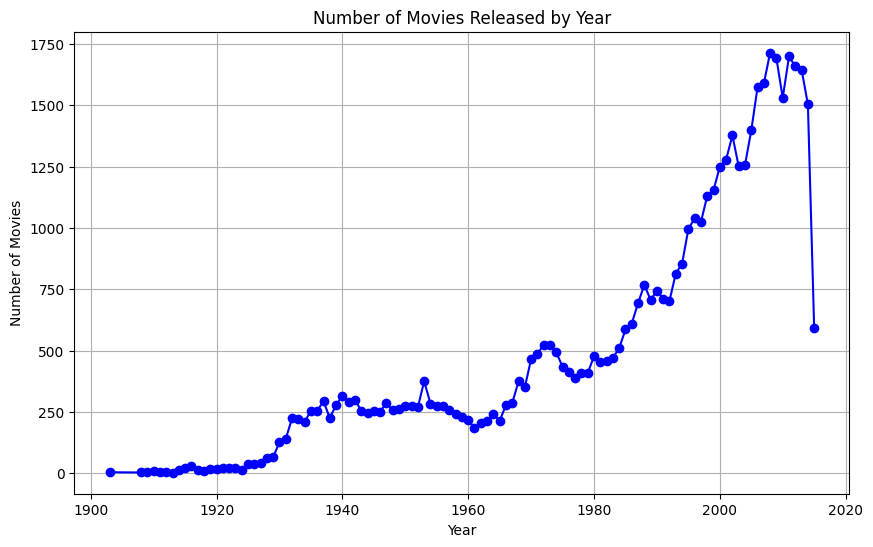

In [149]:
# 1. Number of Movies Released by Year
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of movies released each year
movies_per_year = df_cleaned.groupby('year').size()

# Plot the number of movies released over the years
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


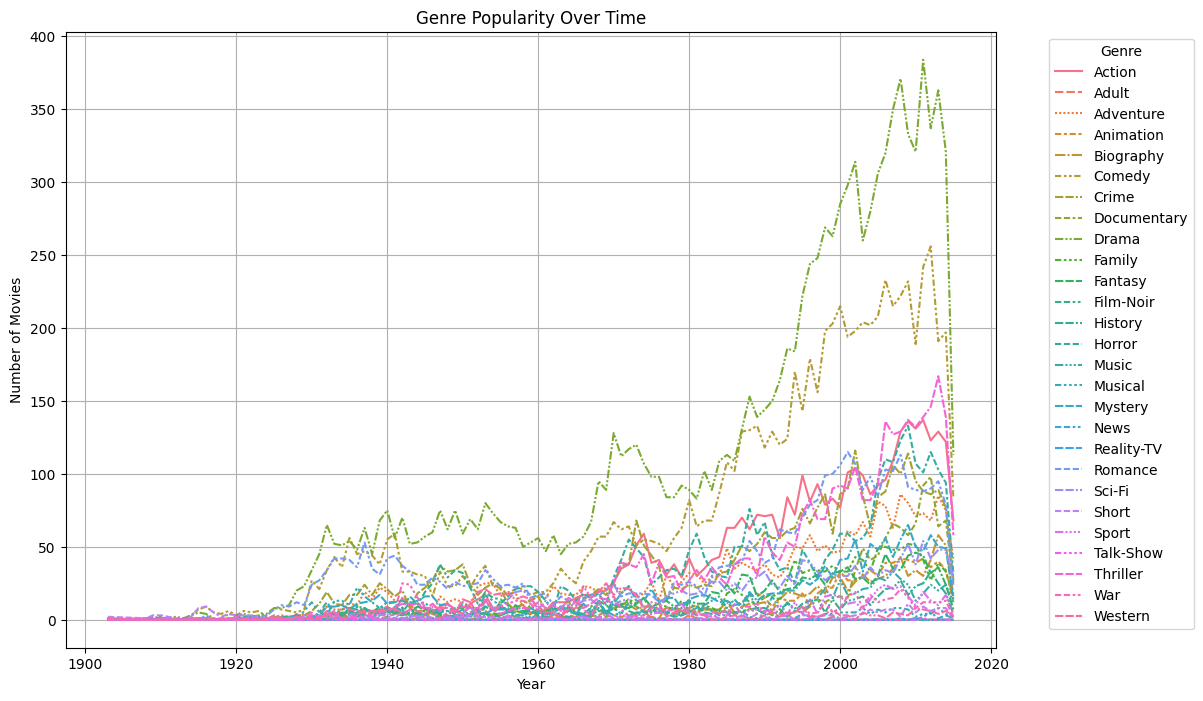

In [150]:
# Genre Popularity Over Time
# Count the number of movies per genre per year
genre_per_year = df_cleaned.groupby(['year', 'genre']).size().unstack().fillna(0)

# Plot the trend of genre popularity over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_per_year)
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


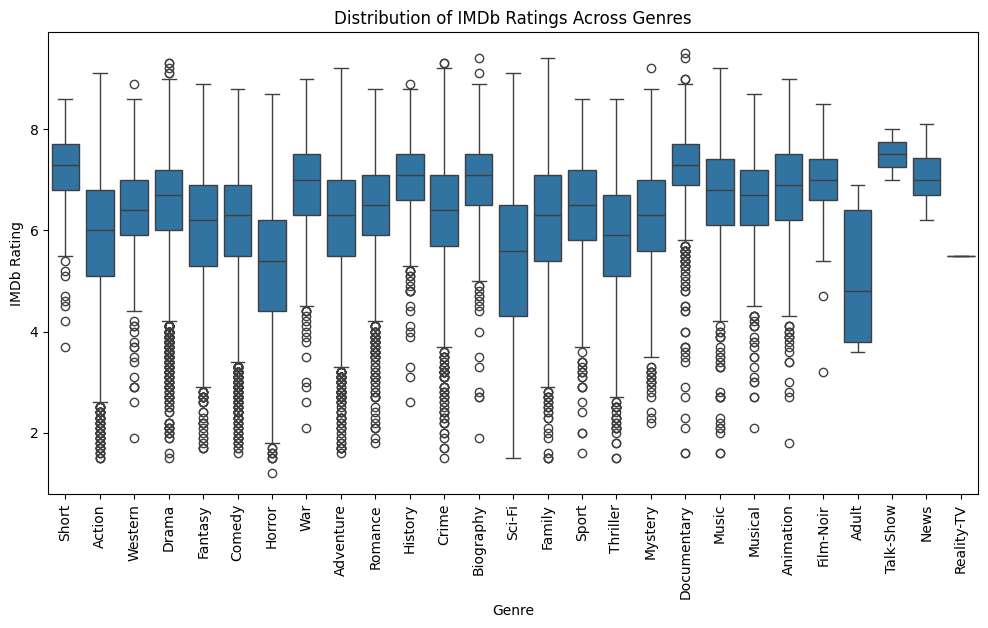

In [151]:
# Distribution of IMDb Ratings Across Genres
# Create a boxplot to show the distribution of IMDb ratings for each genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='imdbRating', data=df_cleaned)
plt.title('Distribution of IMDb Ratings Across Genres')
plt.xticks(rotation=90)
plt.ylabel('IMDb Rating')
plt.xlabel('Genre')
plt.show()


C:\Users\bibek\AppData\Local\Temp\ipykernel_18472\1642038401.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runtime_genre.index, y=avg_runtime_genre.values, palette='viridis')


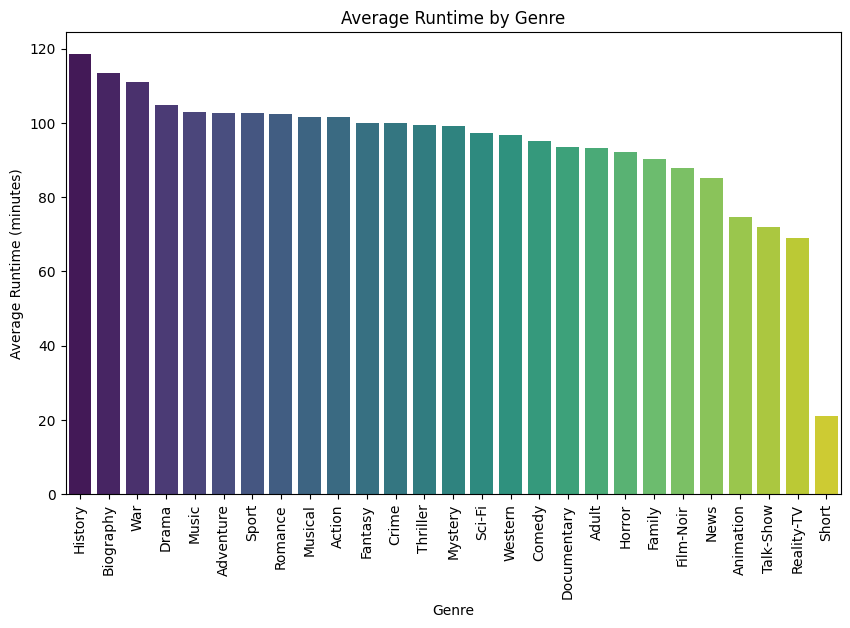

In [154]:
# # Average Runtime by Genre
# # Calculate average runtime per genre
avg_runtime_genre = df_cleaned.groupby('genre')['runtime'].mean().sort_values(ascending=False)

# Plot the average runtime by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_runtime_genre.index, y=avg_runtime_genre.values, palette='viridis')
plt.title('Average Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=90)
plt.show()



<h3>Final Insights/Conclusion</h3><hr>
Based on the analysis of the IMDb dataset, focusing on trends in movie production and genre popularity, we observed several key insights:

<h5>1. Trends in Movie Production Over Time</h5>
The number of movies produced has significantly increased over the years, with notable spikes in production during certain decades. This suggests that the global film industry has expanded rapidly, especially in recent years.
Factors such as advancements in filmmaking technology, easier access to production resources, and the rise of streaming platforms may have contributed to this boom in movie production.
<h5>2. Shifting Popularity of Movie Genres</h5>
The analysis of genre popularity over time reveals clear shifts in audience preferences. For example, certain genres like drama and action have remained consistently popular, while others like musical and western have seen a decline in production over the decades.
In more recent years, genres such as science fiction and fantasy have gained prominence, potentially due to the rise of franchises and high-budget productions with significant visual effects.
<h5>3. Genre vs. IMDb Ratings</h5>
Our analysis of IMDb ratings across different genres shows that certain genres, such as documentary and biography, tend to have higher average ratings. This may indicate that audiences are more critical of genres that rely on factual storytelling or education.
On the other hand, genres like horror and comedy exhibit a wider range of ratings, likely due to subjective tastes, as audience responses to humor or fear are highly individual.
<h5>4. Movie Runtime Analysis</h5>
The analysis of average movie runtimes by genre shows that genres like epic and drama tend to have longer runtimes, while genres like comedy and horror generally have shorter runtimes. This likely reflects the storytelling needs of different genres, where epics and dramas often require more time for character development and narrative complexity.
Interestingly, the increasing runtime of certain movies may reflect a shift towards more complex storytelling, particularly in genres like fantasy and action, where modern blockbuster films are often longer to accommodate intricate plotlines and visual effects.

<h3>Conclusion</h3><hr>

Overall, the analysis provides a clear picture of how the movie industry has evolved over time, both in terms of the quantity of films produced and the changing tastes of audiences. Genres that were once dominant have given way to new forms of entertainment as filmmaking technologies and audience demands continue to evolve.
The relationship between genres and IMDb ratings suggests that while some genres receive consistently high ratings, others are more variable, possibly due to the nature of the genre itself or differing audience expectations.
The trends observed in runtime suggest a shift towards longer, more immersive films in some genres, while others have remained concise and focused on delivering entertainment in shorter formats.
This exploration of movie production trends and genre popularity offers a valuable perspective for filmmakers, producers, and researchers, shedding light on how the film industry is influenced by societal shifts and technological advancements.